# Deep Learning Problem Set

## Part II Applied Problems -- 2.2 Image

- References:
  - https://blog.keras.io/building-autoencoders-in-keras.html
  - https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import datetime
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# import warnings
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
print(f"Version of tf = {tf.version.VERSION}")

# test GPU setting
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available GPUs = ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version of tf = 2.3.0
Available GPUs =  1


### 2.2.0 Loading Fashion MNIST Dataset

In [2]:
# load Fashion MNIST dataset with training set and test set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train data shape:", x_train.shape)
print("y_train label shape:", y_train.shape)

x_train data shape: (60000, 28, 28)
y_train label shape: (60000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

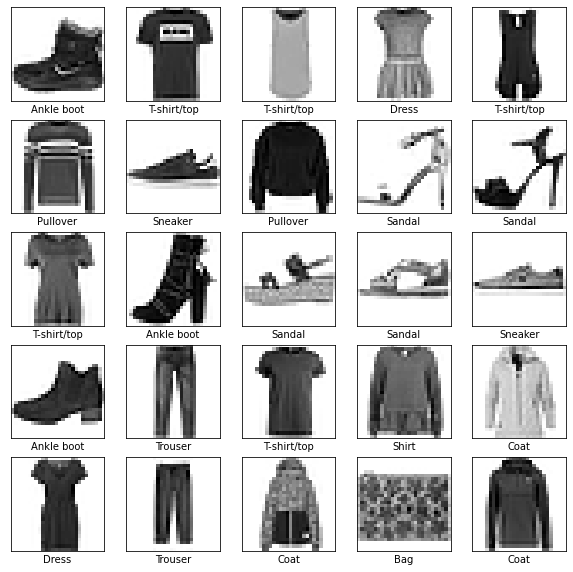

In [3]:
# visualize the first 25 images from the training set
plt.rcParams['image.cmap'] = 'Greys'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
plt.show()

In [4]:
# pre-processing
# Normalize the data 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"Original x training data size = {x_train.shape}.")
print(f"Original x test data size = {x_test.shape}.")

# reshape with suitable input format
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(f"Normalized and reshaped x training data size = {x_train.shape}.")
print(f"Normalized and reshaped x test data size = {x_test.shape}.")

Original x training data size = (60000, 28, 28).
Original x test data size = (10000, 28, 28).
Normalized and reshaped x training data size = (60000, 784).
Normalized and reshaped x test data size = (10000, 784).


### 2.2.1 Autoencoder

- Train a fully-connected autoencoder with ReLU activation and layer sizes (784, 300, 100,3 00, 784) for 10 epochs. 
- Use mean squared error (MSE) loss.

In [5]:
# Build of a fully-connected autoencoder model

def autoencoder_model(input_shape):
    """ Build of a fully-connected autoencoder with ReLU activation 
    and layer sizes (784, 300, 100, 300, 784); Use mean squared error (MSE) loss. 
    """
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # set encoders
    model.add(layers.Dense(300, activation='relu'))
    encoded = layers.Dense(100, activation='relu')
    model.add(encoded)
    
    # set decoders
    model.add(layers.Dense(300, activation='relu'))
    decoded = layers.Dense(784, activation='sigmoid')
    model.add(decoded)
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    
    return model

In [6]:
# model info
autoencoder = autoencoder_model(input_shape=(784,))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               235984    
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [7]:
# train the auto encoder with 10 epochs without labels

autoencoder.fit(x_train, 
                x_train,
                batch_size=256,
                epochs=10,
                shuffle=True)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.0099
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0174 - accuracy: 0.0148
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0140 - accuracy: 0.0217
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0124 - accuracy: 0.0255
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0114 - accuracy: 0.0287
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.0295
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.0319
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0098 - accuracy: 0.0335
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.0351
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0089 - accuracy: 0.0370

In [8]:
# Make predictions
decoded_mnist = autoencoder.predict(x_train)

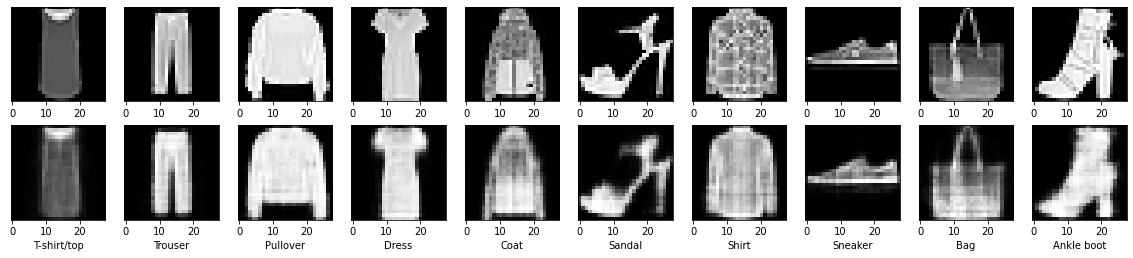

In [9]:
# visualize the reconstructed inputs and the decoded images representations
plt.figure(figsize=(20, 4))

for i_class in range(len(class_names)):
    # Display original
    ax = plt.subplot(2, len(class_names), i_class + 1)
    i = np.argwhere(y_train == i_class)[1, 0]
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, len(class_names), i_class + 1 + len(class_names))
    plt.imshow(decoded_mnist[i].reshape(28, 28))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

In [10]:
# training the encoder with half of the autoencoder architecture
encoder = keras.Sequential()
encoder.add(layers.InputLayer(input_shape=(784,)))
encoder.add(layers.Dense(300, activation='relu'))
encoded = layers.Dense(100, activation='relu')
encoder.add(encoded)

encoded_mnist = encoder.predict(x_train)

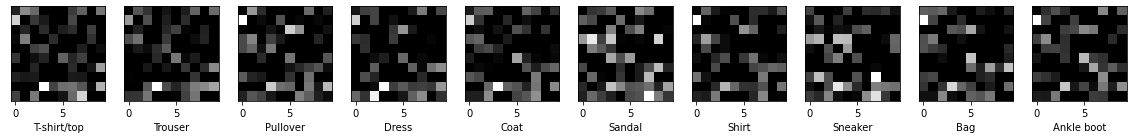

In [11]:
# plot the encodings for ten examples of input, each class as 10x10 heatmaps

plt.figure(figsize=(20, 4))

for i_class in range(len(class_names)):
    i = np.argwhere(y_train == i_class)[1, 0]
    ax = plt.subplot(1, len(class_names), i_class + 1)
    plt.imshow(encoded_mnist[i].reshape((10, 10)))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

**Summary**: 
- From the reconstructed heatmaps for each class of Fashion MNIST dataset, We are losing quite a bit of detail with this basic encoder approach.

### 2.2.2 Dropout

- Retrain the autoencoder with dropout applied to incoming weights to all layers except the input and output layers.

In [12]:
# define the autoencoder with dropout layers model

def autoencoder_dropout_model(input_shape):
    """ Build of a fully-connected autoencoder with ReLU activation 
    and layer sizes (784, 300, 100, 300, 784); Use mean squared error (MSE) 
    loss, with dropout applied to incoming weights to all layers 
    except the input and output layers
    """
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # set encoders with dropout
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dropout(0.25))  # first dropout layer
    encoded = layers.Dense(100, activation='relu')
    model.add(encoded)
    model.add(layers.Dropout(0.25))  # second dropout layer
    
    # set decoders
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dropout(0.50))  # third dropout layer
    decoded = layers.Dense(784, activation='sigmoid')
    model.add(decoded)
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['accuracy'])
    
    return model

In [13]:
# model info
autoencoder_dropout = autoencoder_dropout_model(input_shape=(784,))
autoencoder_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               30300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 784)              

In [14]:
# train the with-dropout auto encoder with 10 epochs without labels

autoencoder_dropout.fit(x_train, 
                x_train,
                batch_size=256,
                epochs=10,
                shuffle=True)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0506 - accuracy: 0.0081
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0292 - accuracy: 0.0132
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.0157
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0248 - accuracy: 0.0149
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.0170
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.0167
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0226 - accuracy: 0.0179
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.0180
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.0186
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.0186

In [15]:
# Make predictions
decoded_mnist = autoencoder_dropout.predict(x_train)

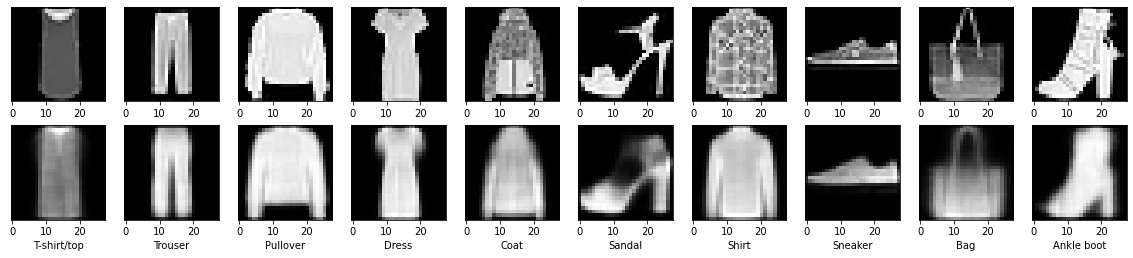

In [16]:
# visualize the reconstructed inputs and the decoded images representations
plt.figure(figsize=(20, 4))

for i_class in range(len(class_names)):
    # Display original
    ax = plt.subplot(2, len(class_names), i_class + 1)
    i = np.argwhere(y_train == i_class)[1, 0]
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, len(class_names), i_class + 1 + len(class_names))
    plt.imshow(decoded_mnist[i].reshape(28, 28))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

In [17]:
# training the encoder with half of the autoencoder architecture
encoder = keras.Sequential()
encoder.add(layers.InputLayer(input_shape=(784,)))
encoder.add(layers.Dense(300, activation='relu'))
encoder.add(layers.Dropout(0.25))
encoded = layers.Dense(100, activation='relu')
encoder.add(encoded)

encoded_mnist = encoder.predict(x_train)

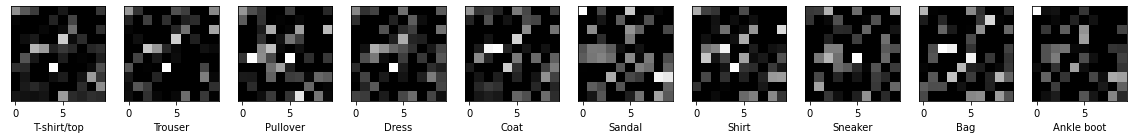

In [18]:
# plot the encodings for ten examples of input, each class as 10x10 heatmaps, 
# display the same plots as section 2.2.1

plt.figure(figsize=(20, 4))

for i_class in range(len(class_names)):
    i = np.argwhere(y_train == i_class)[1, 0]
    ax = plt.subplot(1, len(class_names), i_class + 1)
    plt.imshow(encoded_mnist[i].reshape((10, 10)))
    plt.gray()
    plt.xlabel(class_names[i_class])
    ax.get_yaxis().set_visible(False)

plt.show()

**Summary**: 
  
From the reconstructed heatmaps for each class of Fashion MNIST dataset with dropout layers applied to incoming weights to all layers
except the input and output layers:
- I set dropout rate of 0.25, 0.25, and 0.5 for the three dropout layers.
- From the training epochs logs above, comparing with the autoencoder without any dropout layers, a greater MSE but higher training accuracy was achieved. 
- I conclude that the dropout layers worked as regularizer on neural nets that reduces the odds of overfitting by dropping out neurons at random, during every epoch.

### 2.2.3 CNN (baseline) 
Train a convolutional neural network on the training data with the
following layer specifications:
- 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
- 2x2 max pooling
- 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
- fully-connected layer, 56 nodes, ReLU activation
- fully-connected layer, 10 nodes, softmax activation

Use the Adam optimizer, 32 observations per batch, and sparse categorical cross-entropy loss.

In [19]:
# re-load Fashion MNIST data for new data pre-processing

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train data shape:", x_train.shape)
print("y_train label shape:", y_train.shape)

x_train data shape: (60000, 28, 28)
y_train label shape: (60000,)


In [20]:
# pre-processing
# Normalize the data 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"Original x training data size = {x_train.shape}.")
print(f"Original x test data size = {x_test.shape}.")

# reshape images with suitable input format
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(f"Normalized and reshaped x training data size = {x_train.shape}.")
print(f"Normalized and reshaped x test data size = {x_test.shape}.")

# use the last 12000 samples of the training data as a validation set
x_train = x_train[:-12000]
x_valid = x_train[-12000:]  # last 12000 samples
y_train = y_train[:-12000]
y_valid = y_train[-12000:]  # last 12000 samples
print(f"New training image set size = {x_train.shape}.")
print(f"New training label set size = {y_train.shape}.")
print(f"New validation image set size = {x_valid.shape}.")
print(f"New validation label set size = {y_valid.shape}.")
print(f"Left test image set size = {x_test.shape}.")
print(f"Left test label set size = {y_test.shape}.")

Original x training data size = (60000, 28, 28).
Original x test data size = (10000, 28, 28).
Normalized and reshaped x training data size = (60000, 28, 28, 1).
Normalized and reshaped x test data size = (10000, 28, 28, 1).
New training image set size = (48000, 28, 28, 1).
New training label set size = (48000,).
New validation image set size = (12000, 28, 28, 1).
New validation label set size = (12000,).
Left test image set size = (10000, 28, 28, 1).
Left test label set size = (10000,).


In [21]:
# define the CNN baseline model

def cnn_baseline_model(input_shape):
    """ Build the CNN baseline model as provided layer details:
    - 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
    - 2x2 max pooling
    - 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
    - fully-connected layer, 56 nodes, ReLU activation
    - fully-connected layer, 10 nodes, softmax activation
    with the Adam optimizer, and sparse categorical cross-entropy loss.
    """
    model = keras.Sequential()
    
    # define the input shape in the first layer of the neural network
    model.add(layers.Conv2D(28, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(56, (3, 3), activation='relu', padding='same'))

    # transforms the format of the images from a two-dimensional array 
    # (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    model.add(tf.keras.layers.Flatten())

    model.add(layers.Dense(56, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    
    return model

In [22]:
# Print the number of trainable parameters in the model
cnn_baseline = cnn_baseline_model(input_shape=(28,28,1))
cnn_baseline.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
flatten (Flatten)            (None, 10976)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 56)                614712    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                570       
Total params: 629,730
Trainable params: 629,730
Non-trainable params: 0
________________________________________________

In [23]:
# train the CNN baseline model with 32 observations per batch for 10 epochs

history = cnn_baseline.fit(x_train, 
                           y_train,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           validation_data=(x_valid, y_valid),
                           verbose=2)

Epoch 1/10
1500/1500 - 4s - loss: 0.4047 - accuracy: 0.8540 - val_loss: 0.2791 - val_accuracy: 0.9013
Epoch 2/10
1500/1500 - 4s - loss: 0.2660 - accuracy: 0.9041 - val_loss: 0.2189 - val_accuracy: 0.9239
Epoch 3/10
1500/1500 - 4s - loss: 0.2197 - accuracy: 0.9190 - val_loss: 0.1818 - val_accuracy: 0.9363
Epoch 4/10
1500/1500 - 4s - loss: 0.1825 - accuracy: 0.9335 - val_loss: 0.1431 - val_accuracy: 0.9483
Epoch 5/10
1500/1500 - 4s - loss: 0.1522 - accuracy: 0.9440 - val_loss: 0.1097 - val_accuracy: 0.9628
Epoch 6/10
1500/1500 - 4s - loss: 0.1232 - accuracy: 0.9551 - val_loss: 0.0878 - val_accuracy: 0.9695
Epoch 7/10
1500/1500 - 4s - loss: 0.1004 - accuracy: 0.9627 - val_loss: 0.0708 - val_accuracy: 0.9770
Epoch 8/10
1500/1500 - 4s - loss: 0.0806 - accuracy: 0.9709 - val_loss: 0.0649 - val_accuracy: 0.9759
Epoch 9/10
1500/1500 - 4s - loss: 0.0649 - accuracy: 0.9760 - val_loss: 0.0517 - val_accuracy: 0.9800
Epoch 10/10
1500/1500 - 4s - loss: 0.0517 - accuracy: 0.9814 - val_loss: 0.0356 - 

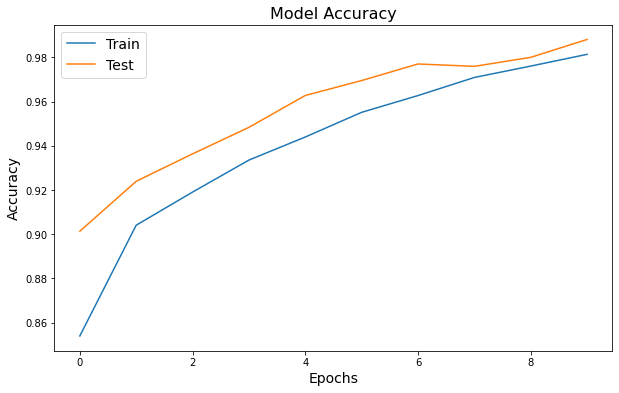

In [24]:
# plot training and validation accuracy as line plots on the same set of axes

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy", fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(['Train', 'Test'], fontsize=14)
plt.show()

In [25]:
# Evaluating the CNN baseline model

score = cnn_baseline.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.9175
Loss: 0.3503
Accuracy: 0.9175


In [26]:
# Show an example from the test set for each class where the model misclassifies

# define the label dict
cloth_dict = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

# change y_test to categorical data
y_test_cat = to_categorical(y_test, num_classes=10)

# Predict the values from the validation dataset
y_pred = cnn_baseline.predict(x_test)

# Convert predictions classes and validation observations to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test_cat, axis=1)

In [27]:
incorrect_labels = []  # record index of incorrect labels
temp_y_true = []  # record unique class of true labels

for i in range(10000):
  if not (y_pred_classes[i] == y_true[i]):
    if y_true[i] in temp_y_true:
      pass
    else:
      incorrect_labels.append(i)
      temp_y_true.append(y_true[i])
    if (len(set(temp_y_true)) == 10):
      break

print(f"The collected unique misclassified one-hot labels = {incorrect_labels}.")

The collected unique misclassified one-hot labels = [12, 17, 23, 40, 42, 48, 192, 332, 529, 902].


Text(0.5, 1.0, 'Predicted Label: Ankle boot\nActual Label: Sandal')

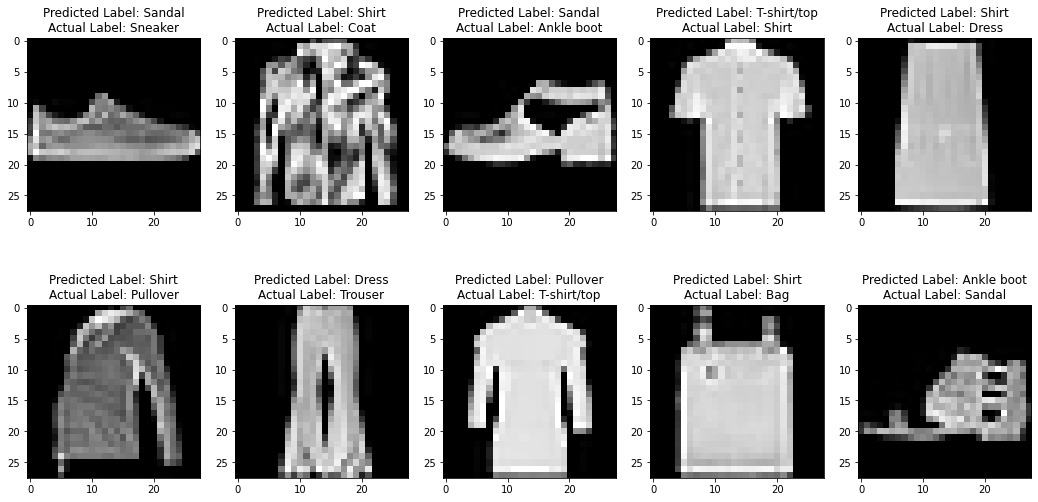

In [28]:
# make the misclassification matrix

fig, ax = plt.subplots(2, 5, figsize=(12, 6))
fig.set_size_inches(18, 9)

ax[0,0].imshow(x_test[incorrect_labels[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[0]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[0]]]))

ax[0,1].imshow(x_test[incorrect_labels[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[1]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[1]]]))

ax[0,2].imshow(x_test[incorrect_labels[2]].reshape(28,28), cmap='gray')
ax[0,2].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[2]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[2]]]))

ax[0,3].imshow(x_test[incorrect_labels[3]].reshape(28,28), cmap='gray')
ax[0,3].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[3]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[3]]]))

ax[0,4].imshow(x_test[incorrect_labels[4]].reshape(28,28), cmap='gray')
ax[0,4].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[4]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[4]]]))

ax[1,0].imshow(x_test[incorrect_labels[5]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[5]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[5]]]))

ax[1,1].imshow(x_test[incorrect_labels[6]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[6]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[6]]]))

ax[1,2].imshow(x_test[incorrect_labels[7]].reshape(28,28), cmap='gray')
ax[1,2].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[7]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[7]]]))

ax[1,3].imshow(x_test[incorrect_labels[8]].reshape(28,28), cmap='gray')
ax[1,3].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[8]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[8]]]))

ax[1,4].imshow(x_test[incorrect_labels[9]].reshape(28,28), cmap='gray')
ax[1,4].set_title("Predicted Label: " + str(cloth_dict[y_pred_classes[incorrect_labels[9]]]) + "\n"+"Actual Label: " + 
                 str(cloth_dict[y_true[incorrect_labels[9]]]))

In [29]:
# Classification Report

print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.88      0.86      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Answer to the questions**:
1. Number of trainable parameters in the CNN baseline model = 629,730, as shown in model summary above.
2. Plot of training and validation accuracy at the end of each epoch was shown as above code block.
3. Accuracy on the test set = 0.9175, as shown above.
4. Figure matrix of an example from the test set for each class where the model misclassifies was shown as above.
5. Based on the classification report shown above:
  - Trouser and Sandal shared the best precision.
  - Trouser, Sandal, Sneaker, and Bag all showed best recall.
  - Trouser also showed the best F1 score.
  - Shirt showed worst classification statistics.

### 2.2.4 CNN (improvements)

- Modify the baseline CNN model to obtain at least 91% accuracy
on the test set. 
- Note the above CNN baseline model already achieved 91% + accuracy. 



In [30]:
# define the CNN improved model

def cnn_improved_model(input_shape):
    """ Build the CNN baseline model as provided layer details:
    - 2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
    - 2x2 max pooling
    - 2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
    - fully-connected layer, 56 nodes, ReLU activation
    - fully-connected layer, 10 nodes, softmax activation
    with the Adam optimizer, and sparse categorical cross-entropy loss.
    """
    model = keras.Sequential()
    
    # define the input shape in the first layer of the neural network
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.4))

    # transforms the format of the images from a two-dimensional array 
    # (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
    model.add(tf.keras.layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])
    
    return model

In [34]:
# Improved CNN model summary
cnn_improved = cnn_improved_model(input_shape=(28,28,1))
cnn_improved.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)            

In [37]:
# train the CNN improved model with 32 observations per batch for 10 epochs

history = cnn_improved.fit(x_train, 
                           y_train,
                           batch_size=64,
                           epochs=10,
                           shuffle=True,
                           validation_data=(x_valid, y_valid),
                           verbose=2)

Epoch 1/10
750/750 - 4s - loss: 0.1134 - accuracy: 0.9573 - val_loss: 0.0646 - val_accuracy: 0.9760
Epoch 2/10
750/750 - 4s - loss: 0.1066 - accuracy: 0.9594 - val_loss: 0.0532 - val_accuracy: 0.9824
Epoch 3/10
750/750 - 4s - loss: 0.1059 - accuracy: 0.9600 - val_loss: 0.0495 - val_accuracy: 0.9830
Epoch 4/10
750/750 - 4s - loss: 0.0983 - accuracy: 0.9632 - val_loss: 0.0461 - val_accuracy: 0.9840
Epoch 5/10
750/750 - 4s - loss: 0.0984 - accuracy: 0.9625 - val_loss: 0.0414 - val_accuracy: 0.9858
Epoch 6/10
750/750 - 4s - loss: 0.0916 - accuracy: 0.9656 - val_loss: 0.0360 - val_accuracy: 0.9887
Epoch 7/10
750/750 - 4s - loss: 0.0890 - accuracy: 0.9660 - val_loss: 0.0332 - val_accuracy: 0.9881
Epoch 8/10
750/750 - 4s - loss: 0.0870 - accuracy: 0.9671 - val_loss: 0.0297 - val_accuracy: 0.9884
Epoch 9/10
750/750 - 4s - loss: 0.0856 - accuracy: 0.9678 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 10/10
750/750 - 4s - loss: 0.0798 - accuracy: 0.9695 - val_loss: 0.0270 - val_accuracy: 0.9920

In [38]:
# Evaluating the CNN improved model

score = cnn_improved.evaluate(x_test, y_test)
print('Improved CNN model Loss: {:.4f}'.format(score[0]))
print('Improved CNN model Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.9270
Improved CNN model Loss: 0.2926
Improved CNN model Accuracy: 0.9270


**Improved CNN Model Summary**:
- The improved CNN model has test set accuracy = 0.9270.
- The detailed model architecture and hyperparameters were implemented inside of the function `cnn_improved_model`.
- The justifications were based on:
  - Adding Dropout layers before Conv2D layer, Flatten layer, and fully-connected layer.
  - Increase the number of filters in Conv2D layers and fully-connected layers.
  - Increase the batch size from 32 to 64.